In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import math
from scipy.integrate import quad, fixed_quad
import matplotlib.pyplot as plt
import pickle
import numpy as np
import functools
import sys
from tqdm import tqdm, trange
from aemulusnu_massfunction.utils import *
from aemulusnu_massfunction.emulator import *

from classy import Class

import math
import torch
import gpytorch
from matplotlib import pyplot as plt

import pyccl as ccl


In [3]:
leave_out_box = 'Box0_1400'
leave_out_box = 'Box_n50_14_1400'
print('Leaving out', leave_out_box)

cosmos_f = open('../data/cosmo_params.pkl', 'rb')
cosmo_params = pickle.load(cosmos_f) #cosmo_params is a dict
cosmos_f.close()

a_list_fname = '/oak/stanford/orgs/kipac/users/delon/aemulusnu_massfunction/alist.pkl'
a_list_f = open(a_list_fname, 'rb')
a_list = pickle.load(a_list_f)
a_list_f.close()

Leaving out Box_n50_14_1400


In [4]:
weird_boxes = []


errors = {a:{} for a in a_list}
X = []
Y = []
Xlo = []
Ylo = []
z_to_a = {}
a_to_z = {}
kt = np.logspace(-3, 1, 100) # h/Mpc
for box in tqdm(cosmo_params):
    if(box in weird_boxes):
        continue
    curr_cosmo = cosmo_params[box]
    if(box == 'Box_n50_0_1400'):
        print(curr_cosmo)

    curr_cosmo_values = [curr_cosmo[curr_key] for curr_key in key_ordering]

    h = curr_cosmo['H0']/100

    Ωb =  curr_cosmo['ombh2'] / h**2
    Ωc =  curr_cosmo['omch2'] / h**2

    cosmo = ccl.Cosmology(Omega_c=Ωc,
                          Omega_b=Ωb,
                          h=h,
                          A_s=curr_cosmo['10^9 As']*10**(-9),
                          n_s=curr_cosmo['ns'],
                          w0=curr_cosmo['w0'],
                          m_nu=[curr_cosmo['nu_mass_ev']/3, curr_cosmo['nu_mass_ev']/3, curr_cosmo['nu_mass_ev']/3])


    for a in a_list:
        try:
            z = scaleToRedshift(a)
#             if(z>2):
#                 assert(1==0)
            z_to_a[z] = a
            a_to_z[a] = z

            with open("/oak/stanford/orgs/kipac/users/delon/aemulusnu_massfunction/%s_%.2f_params.pkl"%(box, a), "rb") as f:
                MLE_params = pickle.load(f)
                param_values = list(MLE_params.values())
                if(leave_out_box == box):
                    Xlo += [curr_cosmo_values + [a]]
                    Ylo += [param_values]
                else:
                    X+= [curr_cosmo_values + [a]]
                    Y+= [param_values]
        except:
            print('no data for', box, 'redshift', scaleToRedshift(a))

  1%|          | 1/150 [00:00<00:48,  3.07it/s]

no data for Box0_1400 redshift 2.3038301302700224


  1%|▏         | 2/150 [00:00<00:41,  3.56it/s]

no data for Box1_1400 redshift 2.3038301302700224


  2%|▏         | 3/150 [00:00<00:45,  3.20it/s]

no data for Box2_1400 redshift 2.3038301302700224


  3%|▎         | 4/150 [00:01<00:46,  3.13it/s]

no data for Box3_1400 redshift 2.3038301302700224


  3%|▎         | 5/150 [00:01<00:42,  3.42it/s]

no data for Box4_1400 redshift 2.3038301302700224


  4%|▍         | 6/150 [00:01<00:40,  3.52it/s]

no data for Box5_1400 redshift 2.3038301302700224


  5%|▍         | 7/150 [00:02<00:40,  3.55it/s]

no data for Box6_1400 redshift 2.3038301302700224


  5%|▌         | 8/150 [00:02<00:39,  3.60it/s]

no data for Box7_1400 redshift 2.3038301302700224


  6%|▌         | 9/150 [00:02<00:39,  3.57it/s]

no data for Box8_1400 redshift 2.3038301302700224


  7%|▋         | 10/150 [00:02<00:38,  3.61it/s]

no data for Box9_1400 redshift 2.3038301302700224


  7%|▋         | 11/150 [00:03<00:37,  3.69it/s]

no data for Box10_1400 redshift 2.3038301302700224


  9%|▊         | 13/150 [00:03<00:34,  4.01it/s]

no data for Box11_1400 redshift 2.3038301302700224
no data for Box12_1400 redshift 2.3038301302700224


  9%|▉         | 14/150 [00:04<00:59,  2.28it/s]

no data for Box13_1400 redshift 2.3038301302700224


 10%|█         | 15/150 [00:04<00:49,  2.71it/s]

no data for Box14_1400 redshift 2.3038301302700224


 11%|█         | 16/150 [00:04<00:46,  2.87it/s]

no data for Box15_1400 redshift 2.3038301302700224


 11%|█▏        | 17/150 [00:05<00:42,  3.13it/s]

no data for Box16_1400 redshift 2.3038301302700224


 12%|█▏        | 18/150 [00:05<00:44,  2.96it/s]

no data for Box17_1400 redshift 2.3038301302700224


 13%|█▎        | 19/150 [00:05<00:42,  3.11it/s]

no data for Box18_1400 redshift 2.3038301302700224


 13%|█▎        | 20/150 [00:06<00:40,  3.21it/s]

no data for Box19_1400 redshift 2.3038301302700224


 14%|█▍        | 21/150 [00:06<00:39,  3.28it/s]

no data for Box20_1400 redshift 2.3038301302700224


 15%|█▍        | 22/150 [00:06<00:36,  3.47it/s]

no data for Box21_1400 redshift 2.3038301302700224


 15%|█▌        | 23/150 [00:06<00:34,  3.65it/s]

no data for Box22_1400 redshift 2.3038301302700224


 16%|█▌        | 24/150 [00:07<00:33,  3.79it/s]

no data for Box23_1400 redshift 2.3038301302700224


 17%|█▋        | 25/150 [00:07<00:32,  3.86it/s]

no data for Box24_1400 redshift 2.3038301302700224


 17%|█▋        | 26/150 [00:07<00:31,  3.88it/s]

no data for Box25_1400 redshift 2.3038301302700224


 18%|█▊        | 27/150 [00:07<00:31,  3.92it/s]

no data for Box26_1400 redshift 2.3038301302700224


 19%|█▊        | 28/150 [00:08<00:33,  3.67it/s]

no data for Box27_1400 redshift 2.3038301302700224


 19%|█▉        | 29/150 [00:09<00:51,  2.37it/s]

no data for Box28_1400 redshift 2.3038301302700224


 20%|██        | 30/150 [00:09<00:44,  2.67it/s]

no data for Box29_1400 redshift 2.3038301302700224


 21%|██        | 31/150 [00:09<00:41,  2.85it/s]

no data for Box30_1400 redshift 2.3038301302700224


 21%|██▏       | 32/150 [00:09<00:38,  3.09it/s]

no data for Box31_1400 redshift 2.3038301302700224


 22%|██▏       | 33/150 [00:10<00:34,  3.36it/s]

no data for Box32_1400 redshift 2.3038301302700224


 23%|██▎       | 34/150 [00:10<00:32,  3.54it/s]

no data for Box33_1400 redshift 2.3038301302700224


 23%|██▎       | 35/150 [00:10<00:31,  3.62it/s]

no data for Box34_1400 redshift 2.3038301302700224


 24%|██▍       | 36/150 [00:10<00:33,  3.45it/s]

no data for Box35_1400 redshift 2.3038301302700224


 25%|██▍       | 37/150 [00:11<00:32,  3.43it/s]

no data for Box36_1400 redshift 2.3038301302700224


 25%|██▌       | 38/150 [00:11<00:31,  3.57it/s]

no data for Box37_1400 redshift 2.3038301302700224


 26%|██▌       | 39/150 [00:11<00:31,  3.48it/s]

no data for Box38_1400 redshift 2.3038301302700224


 27%|██▋       | 40/150 [00:12<00:29,  3.74it/s]

no data for Box39_1400 redshift 2.3038301302700224


 27%|██▋       | 41/150 [00:13<01:16,  1.43it/s]

no data for Box40_1400 redshift 2.3038301302700224


 28%|██▊       | 42/150 [00:14<01:04,  1.68it/s]

no data for Box41_1400 redshift 2.3038301302700224


 29%|██▊       | 43/150 [00:14<00:54,  1.95it/s]

no data for Box42_1400 redshift 2.3038301302700224


 29%|██▉       | 44/150 [00:14<00:46,  2.26it/s]

no data for Box43_1400 redshift 2.3038301302700224


 30%|███       | 45/150 [00:14<00:40,  2.57it/s]

no data for Box44_1400 redshift 2.3038301302700224


 31%|███       | 46/150 [00:16<01:22,  1.26it/s]

no data for Box45_1400 redshift 2.3038301302700224


 31%|███▏      | 47/150 [00:16<01:04,  1.59it/s]

no data for Box46_1400 redshift 2.3038301302700224


 32%|███▏      | 48/150 [00:17<00:52,  1.94it/s]

no data for Box47_1400 redshift 2.3038301302700224


 33%|███▎      | 49/150 [00:17<00:44,  2.27it/s]

no data for Box48_1400 redshift 2.3038301302700224


 33%|███▎      | 50/150 [00:17<00:39,  2.51it/s]

no data for Box49_1400 redshift 2.3038301302700224


 34%|███▍      | 51/150 [00:17<00:34,  2.84it/s]

no data for Box50_1400 redshift 2.3038301302700224


 35%|███▍      | 52/150 [00:18<00:30,  3.19it/s]

no data for Box51_1400 redshift 2.3038301302700224


 35%|███▌      | 53/150 [00:18<00:27,  3.56it/s]

no data for Box52_1400 redshift 2.3038301302700224


 36%|███▌      | 54/150 [00:18<00:27,  3.55it/s]

no data for Box53_1400 redshift 2.3038301302700224


 37%|███▋      | 55/150 [00:18<00:26,  3.61it/s]

no data for Box54_1400 redshift 2.3038301302700224


 37%|███▋      | 56/150 [00:19<00:24,  3.78it/s]

no data for Box55_1400 redshift 2.3038301302700224


 38%|███▊      | 57/150 [00:19<00:26,  3.58it/s]

no data for Box56_1400 redshift 2.3038301302700224


 39%|███▊      | 58/150 [00:19<00:24,  3.78it/s]

no data for Box57_1400 redshift 2.3038301302700224


 39%|███▉      | 59/150 [00:19<00:23,  3.92it/s]

no data for Box58_1400 redshift 2.3038301302700224


 40%|████      | 60/150 [00:20<00:23,  3.84it/s]

no data for Box59_1400 redshift 2.3038301302700224


 41%|████      | 61/150 [00:20<00:21,  4.07it/s]

no data for Box60_1400 redshift 2.3038301302700224


 41%|████▏     | 62/150 [00:20<00:23,  3.71it/s]

no data for Box61_1400 redshift 2.3038301302700224


 42%|████▏     | 63/150 [00:21<00:25,  3.38it/s]

no data for Box62_1400 redshift 2.3038301302700224


 43%|████▎     | 64/150 [00:21<00:25,  3.41it/s]

no data for Box63_1400 redshift 2.3038301302700224


 43%|████▎     | 65/150 [00:21<00:23,  3.57it/s]

no data for Box64_1400 redshift 2.3038301302700224


 44%|████▍     | 66/150 [00:21<00:22,  3.71it/s]

no data for Box65_1400 redshift 2.3038301302700224


 45%|████▍     | 67/150 [00:22<00:22,  3.74it/s]

no data for Box66_1400 redshift 2.3038301302700224


 45%|████▌     | 68/150 [00:22<00:22,  3.67it/s]

no data for Box67_1400 redshift 2.3038301302700224


 46%|████▌     | 69/150 [00:22<00:21,  3.81it/s]

no data for Box68_1400 redshift 2.3038301302700224


 47%|████▋     | 70/150 [00:22<00:20,  3.83it/s]

no data for Box69_1400 redshift 2.3038301302700224


 47%|████▋     | 71/150 [00:23<00:20,  3.79it/s]

no data for Box70_1400 redshift 2.3038301302700224


 48%|████▊     | 72/150 [00:23<00:23,  3.30it/s]

no data for Box71_1400 redshift 2.3038301302700224


 49%|████▊     | 73/150 [00:23<00:25,  3.08it/s]

no data for Box72_1400 redshift 2.3038301302700224


 49%|████▉     | 74/150 [00:24<00:22,  3.32it/s]

no data for Box73_1400 redshift 2.3038301302700224


 50%|█████     | 75/150 [00:24<00:23,  3.14it/s]

no data for Box74_1400 redshift 2.3038301302700224


 51%|█████     | 76/150 [00:24<00:22,  3.23it/s]

no data for Box75_1400 redshift 2.3038301302700224


 51%|█████▏    | 77/150 [00:25<00:20,  3.61it/s]

no data for Box76_1400 redshift 2.3038301302700224


 52%|█████▏    | 78/150 [00:25<00:19,  3.62it/s]

no data for Box77_1400 redshift 2.3038301302700224


 53%|█████▎    | 79/150 [00:25<00:19,  3.71it/s]

no data for Box78_1400 redshift 2.3038301302700224


 53%|█████▎    | 80/150 [00:25<00:20,  3.50it/s]

no data for Box79_1400 redshift 2.3038301302700224


 54%|█████▍    | 81/150 [00:26<00:21,  3.21it/s]

no data for Box80_1400 redshift 2.3038301302700224


 55%|█████▍    | 82/150 [00:26<00:21,  3.13it/s]

no data for Box81_1400 redshift 2.3038301302700224


 55%|█████▌    | 83/150 [00:26<00:20,  3.23it/s]

no data for Box82_1400 redshift 2.3038301302700224


 56%|█████▌    | 84/150 [00:27<00:19,  3.38it/s]

no data for Box83_1400 redshift 2.3038301302700224


 57%|█████▋    | 85/150 [00:27<00:17,  3.63it/s]

no data for Box84_1400 redshift 2.3038301302700224


 58%|█████▊    | 87/150 [00:27<00:15,  3.97it/s]

no data for Box85_1400 redshift 2.3038301302700224
no data for Box86_1400 redshift 2.3038301302700224


 59%|█████▊    | 88/150 [00:28<00:16,  3.81it/s]

no data for Box87_1400 redshift 2.3038301302700224


 59%|█████▉    | 89/150 [00:28<00:17,  3.39it/s]

no data for Box88_1400 redshift 2.3038301302700224


 60%|██████    | 90/150 [00:28<00:18,  3.19it/s]

no data for Box89_1400 redshift 2.3038301302700224


 61%|██████    | 91/150 [00:29<00:18,  3.11it/s]

no data for Box90_1400 redshift 2.3038301302700224


 61%|██████▏   | 92/150 [00:29<00:17,  3.31it/s]

no data for Box91_1400 redshift 2.3038301302700224


 62%|██████▏   | 93/150 [00:29<00:16,  3.37it/s]

no data for Box92_1400 redshift 2.3038301302700224


 63%|██████▎   | 94/150 [00:30<00:16,  3.35it/s]

no data for Box93_1400 redshift 2.3038301302700224


 63%|██████▎   | 95/150 [00:30<00:15,  3.51it/s]

no data for Box94_1400 redshift 2.3038301302700224


 64%|██████▍   | 96/150 [00:30<00:14,  3.62it/s]

no data for Box95_1400 redshift 2.3038301302700224


 65%|██████▍   | 97/150 [00:30<00:13,  3.86it/s]

no data for Box96_1400 redshift 2.3038301302700224


 65%|██████▌   | 98/150 [00:31<00:13,  3.75it/s]

no data for Box97_1400 redshift 2.3038301302700224


 66%|██████▌   | 99/150 [00:31<00:13,  3.84it/s]

no data for Box98_1400 redshift 2.3038301302700224


 67%|██████▋   | 100/150 [00:31<00:14,  3.51it/s]

no data for Box99_1400 redshift 2.3038301302700224
{'ns': 0.97000003, 'H0': 67.0, 'w0': -1.0, 'ombh2': 0.0223, 'omch2': 0.12, 'nu_mass_ev': 0.07071068, '10^9 As': 2.10100315}
no data for Box_n50_0_1400 redshift 2.3038301302700224


 68%|██████▊   | 102/150 [00:32<00:11,  4.36it/s]

no data for Box_n50_1_1400 redshift 2.3038301302700224


 69%|██████▊   | 103/150 [00:32<00:11,  4.12it/s]

no data for Box_n50_2_1400 redshift 2.3038301302700224


 69%|██████▉   | 104/150 [00:32<00:12,  3.77it/s]

no data for Box_n50_3_1400 redshift 2.3038301302700224


 70%|███████   | 105/150 [00:33<00:13,  3.40it/s]

no data for Box_n50_4_1400 redshift 2.3038301302700224


 71%|███████   | 106/150 [00:33<00:13,  3.35it/s]

no data for Box_n50_5_1400 redshift 2.3038301302700224


 71%|███████▏  | 107/150 [00:33<00:12,  3.52it/s]

no data for Box_n50_6_1400 redshift 2.3038301302700224


 72%|███████▏  | 108/150 [00:33<00:12,  3.46it/s]

no data for Box_n50_7_1400 redshift 2.3038301302700224


 73%|███████▎  | 109/150 [00:34<00:14,  2.82it/s]

no data for Box_n50_8_1400 redshift 2.3038301302700224


 73%|███████▎  | 110/150 [00:34<00:12,  3.17it/s]

no data for Box_n50_9_1400 redshift 2.3038301302700224


 74%|███████▍  | 111/150 [00:34<00:11,  3.35it/s]

no data for Box_n50_10_1400 redshift 2.3038301302700224


 75%|███████▍  | 112/150 [00:35<00:11,  3.45it/s]

no data for Box_n50_11_1400 redshift 2.3038301302700224


 75%|███████▌  | 113/150 [00:35<00:10,  3.58it/s]

no data for Box_n50_12_1400 redshift 2.3038301302700224


 76%|███████▌  | 114/150 [00:35<00:09,  3.72it/s]

no data for Box_n50_13_1400 redshift 2.3038301302700224
no data for Box_n50_14_1400 redshift 2.3038301302700224


 77%|███████▋  | 116/150 [00:35<00:07,  4.67it/s]

no data for Box_n50_15_1400 redshift 2.3038301302700224


 78%|███████▊  | 117/150 [00:36<00:07,  4.56it/s]

no data for Box_n50_16_1400 redshift 2.3038301302700224


 79%|███████▊  | 118/150 [00:36<00:08,  3.63it/s]

no data for Box_n50_17_1400 redshift 2.3038301302700224


 79%|███████▉  | 119/150 [00:36<00:08,  3.66it/s]

no data for Box_n50_18_1400 redshift 2.3038301302700224


 80%|████████  | 120/150 [00:37<00:08,  3.37it/s]

no data for Box_n50_19_1400 redshift 2.3038301302700224


 81%|████████  | 121/150 [00:37<00:08,  3.26it/s]

no data for Box_n50_20_1400 redshift 2.3038301302700224


 81%|████████▏ | 122/150 [00:37<00:09,  3.00it/s]

no data for Box_n50_21_1400 redshift 2.3038301302700224


 82%|████████▏ | 123/150 [00:38<00:08,  3.17it/s]

no data for Box_n50_22_1400 redshift 2.3038301302700224


 83%|████████▎ | 124/150 [00:38<00:08,  2.95it/s]

no data for Box_n50_23_1400 redshift 2.3038301302700224


 83%|████████▎ | 125/150 [00:38<00:08,  3.12it/s]

no data for Box_n50_24_1400 redshift 2.3038301302700224


 84%|████████▍ | 126/150 [00:39<00:07,  3.24it/s]

no data for Box_n50_25_1400 redshift 2.3038301302700224


 85%|████████▍ | 127/150 [00:39<00:07,  3.13it/s]

no data for Box_n50_26_1400 redshift 2.3038301302700224


 85%|████████▌ | 128/150 [00:39<00:06,  3.19it/s]

no data for Box_n50_27_1400 redshift 2.3038301302700224


 86%|████████▌ | 129/150 [00:40<00:06,  3.40it/s]

no data for Box_n50_28_1400 redshift 2.3038301302700224


 87%|████████▋ | 130/150 [00:40<00:05,  3.70it/s]

no data for Box_n50_29_1400 redshift 2.3038301302700224


 87%|████████▋ | 131/150 [00:40<00:05,  3.74it/s]

no data for Box_n50_30_1400 redshift 2.3038301302700224


 88%|████████▊ | 132/150 [00:40<00:04,  3.91it/s]

no data for Box_n50_31_1400 redshift 2.3038301302700224


 89%|████████▊ | 133/150 [00:41<00:04,  3.66it/s]

no data for Box_n50_32_1400 redshift 2.3038301302700224


 89%|████████▉ | 134/150 [00:41<00:04,  3.52it/s]

no data for Box_n50_33_1400 redshift 2.3038301302700224


 90%|█████████ | 135/150 [00:41<00:04,  3.65it/s]

no data for Box_n50_34_1400 redshift 2.3038301302700224


 91%|█████████ | 136/150 [00:41<00:03,  3.64it/s]

no data for Box_n50_35_1400 redshift 2.3038301302700224


 91%|█████████▏| 137/150 [00:42<00:03,  3.65it/s]

no data for Box_n50_36_1400 redshift 2.3038301302700224


 92%|█████████▏| 138/150 [00:42<00:03,  3.36it/s]

no data for Box_n50_37_1400 redshift 2.3038301302700224


 93%|█████████▎| 139/150 [00:42<00:03,  3.24it/s]

no data for Box_n50_38_1400 redshift 2.3038301302700224


 93%|█████████▎| 140/150 [00:43<00:03,  3.10it/s]

no data for Box_n50_39_1400 redshift 2.3038301302700224


 94%|█████████▍| 141/150 [00:43<00:02,  3.44it/s]

no data for Box_n50_40_1400 redshift 2.3038301302700224


 95%|█████████▍| 142/150 [00:43<00:02,  3.53it/s]

no data for Box_n50_41_1400 redshift 2.3038301302700224


 95%|█████████▌| 143/150 [00:44<00:02,  3.34it/s]

no data for Box_n50_42_1400 redshift 2.3038301302700224


 96%|█████████▌| 144/150 [00:44<00:01,  3.55it/s]

no data for Box_n50_43_1400 redshift 2.3038301302700224


 97%|█████████▋| 145/150 [00:44<00:01,  3.57it/s]

no data for Box_n50_44_1400 redshift 2.3038301302700224


 97%|█████████▋| 146/150 [00:44<00:01,  3.72it/s]

no data for Box_n50_45_1400 redshift 2.3038301302700224


 98%|█████████▊| 147/150 [00:45<00:00,  3.72it/s]

no data for Box_n50_46_1400 redshift 2.3038301302700224


 99%|█████████▊| 148/150 [00:45<00:00,  3.64it/s]

no data for Box_n50_47_1400 redshift 2.3038301302700224


 99%|█████████▉| 149/150 [00:45<00:00,  3.56it/s]

no data for Box_n50_48_1400 redshift 2.3038301302700224


100%|██████████| 150/150 [00:46<00:00,  3.26it/s]

no data for Box_n50_49_1400 redshift 2.3038301302700224


In [5]:
X = np.array(X)
Y = np.array(Y)
Xlo = np.array(Xlo)
Ylo = np.array(Ylo)
# print(Xlo)
# print(Ylo)

print(X.shape)
print(Y.shape)
################################
print('scaling input')
in_scaler = Normalizer()
in_scaler.fit(X)
X = in_scaler.transform(X)
Xlo = in_scaler.transform(Xlo)
print(X.shape)


print('scaling output')
out_scaler = Standardizer()
out_scaler.fit(Y)
Y = out_scaler.transform(Y)
print(Y.shape)

##REMEMBER TO UNSCALE OUTPUT AND SAVE SCALERS#####

X_train = torch.from_numpy(X).float()
Y_train = torch.from_numpy(Y).float()
n_tasks = len(Y_train[0])

(2086, 8)
(2086, 4)
scaling input
(2086, 8)
scaling output
(2086, 4)


In [6]:
from aemulusnu_massfunction.emulator import *


likelihood = gpytorch.likelihoods.MultitaskGaussianLikelihood(num_tasks=n_tasks)
model = MultitaskGPModel(X_train, Y_train, likelihood)

# "Loss" for GPs - the marginal log likelihood
mll = gpytorch.mlls.ExactMarginalLogLikelihood(likelihood, model)

model.train()
likelihood.train()


training_iterations = 200

In [7]:
epochs_iter = tqdm(range(training_iterations), desc="Iteration")


# Create the optimizer with the initial learning rate
optimizer = torch.optim.AdamW(model.parameters(), lr=0.5, amsgrad=True)  # Includes GaussianLikelihood parameters

for i in epochs_iter:
    # Training step
    model.train()
    likelihood.train()

    optimizer.zero_grad()
    output = model(X_train)
    loss = -mll(output, Y_train)
    epochs_iter.set_postfix(loss=loss.item())
    loss.backward()
    optimizer.step()
    print('Iter %d/%d - Loss: %.4f' % (i + 1, training_iterations, loss.item()))

    # Change learning rate after half of iterations
    if i == training_iterations//10:
        lr = 0.1
        for param_group in optimizer.param_groups:
            param_group['lr'] = lr

    if i == training_iterations//2:
        lr = 0.01
        for param_group in optimizer.param_groups:
            param_group['lr'] = lr
#-.926

Iteration:   0%|          | 1/200 [00:03<10:21,  3.12s/it, loss=1.82]

Iter 1/200 - Loss: 1.8165


Iteration:   1%|          | 2/200 [00:04<07:16,  2.21s/it, loss=1.18]

Iter 2/200 - Loss: 1.1792


Iteration:   2%|▏         | 3/200 [00:06<06:21,  1.94s/it, loss=1.41]

Iter 3/200 - Loss: 1.4112


Iteration:   2%|▏         | 4/200 [00:07<06:00,  1.84s/it, loss=0.749]

Iter 4/200 - Loss: 0.7488


Iteration:   2%|▎         | 5/200 [00:09<05:51,  1.80s/it, loss=0.577]

Iter 5/200 - Loss: 0.5769


Iteration:   3%|▎         | 6/200 [00:11<05:38,  1.74s/it, loss=0.425]

Iter 6/200 - Loss: 0.4254


Iteration:   4%|▎         | 7/200 [00:12<05:29,  1.71s/it, loss=0.276]

Iter 7/200 - Loss: 0.2759


Iteration:   4%|▍         | 8/200 [00:14<05:23,  1.69s/it, loss=0.122]

Iter 8/200 - Loss: 0.1220


Iteration:   4%|▍         | 9/200 [00:16<05:39,  1.78s/it, loss=-.0263]

Iter 9/200 - Loss: -0.0263


Iteration:   5%|▌         | 10/200 [00:18<05:26,  1.72s/it, loss=-.125]

Iter 10/200 - Loss: -0.1250


Iteration:   6%|▌         | 11/200 [00:19<05:20,  1.70s/it, loss=-.193]

Iter 11/200 - Loss: -0.1928


Iteration:   6%|▌         | 12/200 [00:21<05:10,  1.65s/it, loss=-.233]

Iter 12/200 - Loss: -0.2328


Iteration:   6%|▋         | 13/200 [00:22<05:02,  1.62s/it, loss=-.252]

Iter 13/200 - Loss: -0.2524


Iteration:   7%|▋         | 14/200 [00:24<04:57,  1.60s/it, loss=-.285]

Iter 14/200 - Loss: -0.2853


Iteration:   8%|▊         | 15/200 [00:26<04:54,  1.59s/it, loss=-.263]

Iter 15/200 - Loss: -0.2635


Iteration:   8%|▊         | 16/200 [00:27<04:50,  1.58s/it, loss=-.329]

Iter 16/200 - Loss: -0.3288


Iteration:   8%|▊         | 17/200 [00:29<04:47,  1.57s/it, loss=-.391]

Iter 17/200 - Loss: -0.3911


Iteration:   9%|▉         | 18/200 [00:30<04:45,  1.57s/it, loss=-.467]

Iter 18/200 - Loss: -0.4669


Iteration:  10%|▉         | 19/200 [00:32<04:42,  1.56s/it, loss=-.484]

Iter 19/200 - Loss: -0.4844


Iteration:  10%|█         | 20/200 [00:33<04:41,  1.56s/it, loss=-.501]

Iter 20/200 - Loss: -0.5014


Iteration:  10%|█         | 21/200 [00:35<04:39,  1.56s/it, loss=-.501]

Iter 21/200 - Loss: -0.5013


Iteration:  11%|█         | 22/200 [00:36<04:37,  1.56s/it, loss=-.527]

Iter 22/200 - Loss: -0.5274


Iteration:  12%|█▏        | 23/200 [00:38<04:35,  1.55s/it, loss=-.538]

Iter 23/200 - Loss: -0.5377


Iteration:  12%|█▏        | 24/200 [00:40<04:34,  1.56s/it, loss=-.551]

Iter 24/200 - Loss: -0.5508


Iteration:  12%|█▎        | 25/200 [00:41<04:32,  1.56s/it, loss=-.564]

Iter 25/200 - Loss: -0.5640


Iteration:  13%|█▎        | 26/200 [00:43<04:32,  1.56s/it, loss=-.576]

Iter 26/200 - Loss: -0.5764


Iteration:  14%|█▎        | 27/200 [00:44<04:30,  1.56s/it, loss=-.589]

Iter 27/200 - Loss: -0.5892


Iteration:  14%|█▍        | 28/200 [00:46<04:28,  1.56s/it, loss=-.602]

Iter 28/200 - Loss: -0.6023


Iteration:  14%|█▍        | 29/200 [00:47<04:27,  1.56s/it, loss=-.615]

Iter 29/200 - Loss: -0.6146


Iteration:  15%|█▌        | 30/200 [00:49<04:25,  1.56s/it, loss=-.624]

Iter 30/200 - Loss: -0.6239


Iteration:  16%|█▌        | 31/200 [00:50<04:23,  1.56s/it, loss=-.629]

Iter 31/200 - Loss: -0.6295


Iteration:  16%|█▌        | 32/200 [00:52<04:21,  1.56s/it, loss=-.632]

Iter 32/200 - Loss: -0.6317


Iteration:  16%|█▋        | 33/200 [00:54<04:20,  1.56s/it, loss=-.632]

Iter 33/200 - Loss: -0.6321


Iteration:  17%|█▋        | 34/200 [00:55<04:18,  1.56s/it, loss=-.632]

Iter 34/200 - Loss: -0.6318


Iteration:  18%|█▊        | 35/200 [00:57<04:17,  1.56s/it, loss=-.632]

Iter 35/200 - Loss: -0.6319


Iteration:  18%|█▊        | 36/200 [00:58<04:16,  1.57s/it, loss=-.633]

Iter 36/200 - Loss: -0.6335


Iteration:  18%|█▊        | 37/200 [01:00<04:14,  1.56s/it, loss=-.636]

Iter 37/200 - Loss: -0.6357


Iteration:  19%|█▉        | 38/200 [01:02<04:28,  1.66s/it, loss=-.64] 

Iter 38/200 - Loss: -0.6398


Iteration:  20%|█▉        | 39/200 [01:03<04:22,  1.63s/it, loss=-.645]

Iter 39/200 - Loss: -0.6448


Iteration:  20%|██        | 40/200 [01:05<04:18,  1.61s/it, loss=-.65] 

Iter 40/200 - Loss: -0.6500


Iteration:  20%|██        | 41/200 [01:06<04:14,  1.60s/it, loss=-.655]

Iter 41/200 - Loss: -0.6548


Iteration:  21%|██        | 42/200 [01:08<04:11,  1.59s/it, loss=-.659]

Iter 42/200 - Loss: -0.6591


Iteration:  22%|██▏       | 43/200 [01:10<04:08,  1.58s/it, loss=-.663]

Iter 43/200 - Loss: -0.6626


Iteration:  22%|██▏       | 44/200 [01:11<04:06,  1.58s/it, loss=-.666]

Iter 44/200 - Loss: -0.6656


Iteration:  22%|██▎       | 45/200 [01:13<04:04,  1.57s/it, loss=-.668]

Iter 45/200 - Loss: -0.6683


Iteration:  23%|██▎       | 46/200 [01:14<04:03,  1.58s/it, loss=-.67] 

Iter 46/200 - Loss: -0.6702


Iteration:  24%|██▎       | 47/200 [01:16<04:01,  1.58s/it, loss=-.672]

Iter 47/200 - Loss: -0.6719


Iteration:  24%|██▍       | 48/200 [01:17<03:59,  1.57s/it, loss=-.673]

Iter 48/200 - Loss: -0.6731


Iteration:  24%|██▍       | 49/200 [01:19<03:56,  1.57s/it, loss=-.674]

Iter 49/200 - Loss: -0.6741


Iteration:  25%|██▌       | 50/200 [01:21<03:55,  1.57s/it, loss=-.675]

Iter 50/200 - Loss: -0.6754


Iteration:  26%|██▌       | 51/200 [01:22<03:53,  1.57s/it, loss=-.678]

Iter 51/200 - Loss: -0.6775


Iteration:  26%|██▌       | 52/200 [01:24<03:52,  1.57s/it, loss=-.68] 

Iter 52/200 - Loss: -0.6802


Iteration:  26%|██▋       | 53/200 [01:25<03:50,  1.57s/it, loss=-.683]

Iter 53/200 - Loss: -0.6832


Iteration:  27%|██▋       | 54/200 [01:27<03:48,  1.57s/it, loss=-.686]

Iter 54/200 - Loss: -0.6859


Iteration:  28%|██▊       | 55/200 [01:28<03:46,  1.57s/it, loss=-.688]

Iter 55/200 - Loss: -0.6878


Iteration:  28%|██▊       | 56/200 [01:30<03:45,  1.57s/it, loss=-.689]

Iter 56/200 - Loss: -0.6890


Iteration:  28%|██▊       | 57/200 [01:32<03:44,  1.57s/it, loss=-.69] 

Iter 57/200 - Loss: -0.6900


Iteration:  29%|██▉       | 58/200 [01:33<03:42,  1.57s/it, loss=-.691]

Iter 58/200 - Loss: -0.6914


Iteration:  30%|██▉       | 59/200 [01:35<03:41,  1.57s/it, loss=-.693]

Iter 59/200 - Loss: -0.6933


Iteration:  30%|███       | 60/200 [01:36<03:39,  1.57s/it, loss=-.695]

Iter 60/200 - Loss: -0.6954


Iteration:  30%|███       | 61/200 [01:38<03:47,  1.64s/it, loss=-.697]

Iter 61/200 - Loss: -0.6973


Iteration:  31%|███       | 62/200 [01:40<03:47,  1.65s/it, loss=-.699]

Iter 62/200 - Loss: -0.6988


Iteration:  32%|███▏      | 63/200 [01:41<03:43,  1.63s/it, loss=-.7]  

Iter 63/200 - Loss: -0.7003


Iteration:  32%|███▏      | 64/200 [01:43<03:39,  1.61s/it, loss=-.702]

Iter 64/200 - Loss: -0.7020


Iteration:  32%|███▎      | 65/200 [01:44<03:36,  1.60s/it, loss=-.704]

Iter 65/200 - Loss: -0.7040


Iteration:  33%|███▎      | 66/200 [01:46<03:33,  1.59s/it, loss=-.706]

Iter 66/200 - Loss: -0.7061


Iteration:  34%|███▎      | 67/200 [01:48<03:31,  1.59s/it, loss=-.708]

Iter 67/200 - Loss: -0.7081


Iteration:  34%|███▍      | 68/200 [01:49<03:29,  1.59s/it, loss=-.71] 

Iter 68/200 - Loss: -0.7097


Iteration:  34%|███▍      | 69/200 [01:51<03:28,  1.59s/it, loss=-.711]

Iter 69/200 - Loss: -0.7113


Iteration:  35%|███▌      | 70/200 [01:52<03:26,  1.59s/it, loss=-.713]

Iter 70/200 - Loss: -0.7127


Iteration:  36%|███▌      | 71/200 [01:54<03:24,  1.59s/it, loss=-.714]

Iter 71/200 - Loss: -0.7142


Iteration:  36%|███▌      | 72/200 [01:56<03:22,  1.59s/it, loss=-.716]

Iter 72/200 - Loss: -0.7160


Iteration:  36%|███▋      | 73/200 [01:57<03:21,  1.59s/it, loss=-.718]

Iter 73/200 - Loss: -0.7177


Iteration:  37%|███▋      | 74/200 [01:59<03:19,  1.59s/it, loss=-.72] 

Iter 74/200 - Loss: -0.7195


Iteration:  38%|███▊      | 75/200 [02:00<03:24,  1.64s/it, loss=-.721]

Iter 75/200 - Loss: -0.7212


Iteration:  38%|███▊      | 76/200 [02:02<03:21,  1.62s/it, loss=-.723]

Iter 76/200 - Loss: -0.7229


Iteration:  38%|███▊      | 77/200 [02:04<03:18,  1.61s/it, loss=-.725]

Iter 77/200 - Loss: -0.7246


Iteration:  39%|███▉      | 78/200 [02:05<03:15,  1.60s/it, loss=-.727]

Iter 78/200 - Loss: -0.7265


Iteration:  40%|███▉      | 79/200 [02:07<03:12,  1.59s/it, loss=-.728]

Iter 79/200 - Loss: -0.7284


Iteration:  40%|████      | 80/200 [02:08<03:10,  1.59s/it, loss=-.73] 

Iter 80/200 - Loss: -0.7302


Iteration:  40%|████      | 81/200 [02:10<03:09,  1.59s/it, loss=-.732]

Iter 81/200 - Loss: -0.7319


Iteration:  41%|████      | 82/200 [02:12<03:07,  1.59s/it, loss=-.734]

Iter 82/200 - Loss: -0.7335


Iteration:  42%|████▏     | 83/200 [02:13<03:05,  1.59s/it, loss=-.735]

Iter 83/200 - Loss: -0.7353


Iteration:  42%|████▏     | 84/200 [02:15<03:03,  1.58s/it, loss=-.737]

Iter 84/200 - Loss: -0.7370


Iteration:  42%|████▎     | 85/200 [02:16<03:01,  1.58s/it, loss=-.739]

Iter 85/200 - Loss: -0.7388


Iteration:  43%|████▎     | 86/200 [02:18<03:00,  1.58s/it, loss=-.74] 

Iter 86/200 - Loss: -0.7404


Iteration:  44%|████▎     | 87/200 [02:19<02:59,  1.59s/it, loss=-.742]

Iter 87/200 - Loss: -0.7421


Iteration:  44%|████▍     | 88/200 [02:21<02:57,  1.59s/it, loss=-.744]

Iter 88/200 - Loss: -0.7438


Iteration:  44%|████▍     | 89/200 [02:23<03:06,  1.68s/it, loss=-.746]

Iter 89/200 - Loss: -0.7456


Iteration:  45%|████▌     | 90/200 [02:25<03:04,  1.68s/it, loss=-.747]

Iter 90/200 - Loss: -0.7472


Iteration:  46%|████▌     | 91/200 [02:27<03:09,  1.74s/it, loss=-.749]

Iter 91/200 - Loss: -0.7488


Iteration:  46%|████▌     | 92/200 [02:28<03:03,  1.70s/it, loss=-.75] 

Iter 92/200 - Loss: -0.7504


Iteration:  46%|████▋     | 93/200 [02:30<02:57,  1.66s/it, loss=-.752]

Iter 93/200 - Loss: -0.7520


Iteration:  47%|████▋     | 94/200 [02:31<02:53,  1.64s/it, loss=-.753]

Iter 94/200 - Loss: -0.7535


Iteration:  48%|████▊     | 95/200 [02:33<02:50,  1.63s/it, loss=-.755]

Iter 95/200 - Loss: -0.7549


Iteration:  48%|████▊     | 96/200 [02:34<02:47,  1.61s/it, loss=-.756]

Iter 96/200 - Loss: -0.7562


Iteration:  48%|████▊     | 97/200 [02:36<02:45,  1.61s/it, loss=-.758]

Iter 97/200 - Loss: -0.7575


Iteration:  49%|████▉     | 98/200 [02:38<02:44,  1.61s/it, loss=-.759]

Iter 98/200 - Loss: -0.7586


Iteration:  50%|████▉     | 99/200 [02:39<02:41,  1.60s/it, loss=-.76] 

Iter 99/200 - Loss: -0.7596


Iteration:  50%|█████     | 100/200 [02:41<02:39,  1.60s/it, loss=-.76]

Iter 100/200 - Loss: -0.7604


Iteration:  50%|█████     | 101/200 [02:42<02:37,  1.59s/it, loss=-.761]

Iter 101/200 - Loss: -0.7610


Iteration:  51%|█████     | 102/200 [02:44<02:36,  1.60s/it, loss=-.762]

Iter 102/200 - Loss: -0.7616


Iteration:  52%|█████▏    | 103/200 [02:46<02:34,  1.60s/it, loss=-.762]

Iter 103/200 - Loss: -0.7616


Iteration:  52%|█████▏    | 104/200 [02:47<02:32,  1.59s/it, loss=-.762]

Iter 104/200 - Loss: -0.7617


Iteration:  52%|█████▎    | 105/200 [02:49<02:31,  1.59s/it, loss=-.762]

Iter 105/200 - Loss: -0.7617


Iteration:  53%|█████▎    | 106/200 [02:50<02:29,  1.59s/it, loss=-.762]

Iter 106/200 - Loss: -0.7618


Iteration:  54%|█████▎    | 107/200 [02:52<02:27,  1.59s/it, loss=-.762]

Iter 107/200 - Loss: -0.7618


Iteration:  54%|█████▍    | 108/200 [02:54<02:26,  1.59s/it, loss=-.762]

Iter 108/200 - Loss: -0.7619


Iteration:  55%|█████▍    | 109/200 [02:55<02:24,  1.59s/it, loss=-.762]

Iter 109/200 - Loss: -0.7619


Iteration:  55%|█████▌    | 110/200 [02:57<02:23,  1.59s/it, loss=-.762]

Iter 110/200 - Loss: -0.7620


Iteration:  56%|█████▌    | 111/200 [02:58<02:22,  1.60s/it, loss=-.762]

Iter 111/200 - Loss: -0.7620


Iteration:  56%|█████▌    | 112/200 [03:00<02:20,  1.60s/it, loss=-.762]

Iter 112/200 - Loss: -0.7621


Iteration:  56%|█████▋    | 113/200 [03:02<02:27,  1.70s/it, loss=-.762]

Iter 113/200 - Loss: -0.7622


Iteration:  57%|█████▋    | 114/200 [03:04<02:23,  1.67s/it, loss=-.762]

Iter 114/200 - Loss: -0.7623


Iteration:  57%|█████▊    | 115/200 [03:05<02:20,  1.65s/it, loss=-.762]

Iter 115/200 - Loss: -0.7623


Iteration:  58%|█████▊    | 116/200 [03:07<02:17,  1.63s/it, loss=-.762]

Iter 116/200 - Loss: -0.7624


Iteration:  58%|█████▊    | 117/200 [03:08<02:14,  1.62s/it, loss=-.762]

Iter 117/200 - Loss: -0.7624


Iteration:  59%|█████▉    | 118/200 [03:10<02:12,  1.61s/it, loss=-.763]

Iter 118/200 - Loss: -0.7625


Iteration:  60%|█████▉    | 119/200 [03:11<02:09,  1.60s/it, loss=-.763]

Iter 119/200 - Loss: -0.7625


Iteration:  60%|██████    | 120/200 [03:13<02:08,  1.60s/it, loss=-.763]

Iter 120/200 - Loss: -0.7626


Iteration:  60%|██████    | 121/200 [03:15<02:06,  1.60s/it, loss=-.763]

Iter 121/200 - Loss: -0.7627


Iteration:  61%|██████    | 122/200 [03:16<02:04,  1.60s/it, loss=-.763]

Iter 122/200 - Loss: -0.7627


Iteration:  62%|██████▏   | 123/200 [03:18<02:03,  1.60s/it, loss=-.763]

Iter 123/200 - Loss: -0.7628


Iteration:  62%|██████▏   | 124/200 [03:19<02:01,  1.60s/it, loss=-.763]

Iter 124/200 - Loss: -0.7628


Iteration:  62%|██████▎   | 125/200 [03:21<01:59,  1.60s/it, loss=-.763]

Iter 125/200 - Loss: -0.7629


Iteration:  63%|██████▎   | 126/200 [03:23<02:00,  1.62s/it, loss=-.763]

Iter 126/200 - Loss: -0.7629


Iteration:  64%|██████▎   | 127/200 [03:24<01:57,  1.61s/it, loss=-.763]

Iter 127/200 - Loss: -0.7630


Iteration:  64%|██████▍   | 128/200 [03:26<01:56,  1.62s/it, loss=-.763]

Iter 128/200 - Loss: -0.7631


Iteration:  64%|██████▍   | 129/200 [03:28<01:55,  1.62s/it, loss=-.763]

Iter 129/200 - Loss: -0.7631


Iteration:  65%|██████▌   | 130/200 [03:29<01:53,  1.62s/it, loss=-.763]

Iter 130/200 - Loss: -0.7632


Iteration:  66%|██████▌   | 131/200 [03:31<01:55,  1.68s/it, loss=-.763]

Iter 131/200 - Loss: -0.7632


Iteration:  66%|██████▌   | 132/200 [03:33<01:53,  1.66s/it, loss=-.763]

Iter 132/200 - Loss: -0.7633


Iteration:  66%|██████▋   | 133/200 [03:34<01:51,  1.66s/it, loss=-.763]

Iter 133/200 - Loss: -0.7634


Iteration:  67%|██████▋   | 134/200 [03:36<01:50,  1.68s/it, loss=-.763]

Iter 134/200 - Loss: -0.7634


Iteration:  68%|██████▊   | 135/200 [03:38<01:47,  1.66s/it, loss=-.763]

Iter 135/200 - Loss: -0.7635


Iteration:  68%|██████▊   | 136/200 [03:40<01:51,  1.74s/it, loss=-.763]

Iter 136/200 - Loss: -0.7635


Iteration:  68%|██████▊   | 137/200 [03:41<01:47,  1.70s/it, loss=-.764]

Iter 137/200 - Loss: -0.7636


Iteration:  69%|██████▉   | 138/200 [03:43<01:43,  1.67s/it, loss=-.764]

Iter 138/200 - Loss: -0.7636


Iteration:  70%|██████▉   | 139/200 [03:44<01:41,  1.66s/it, loss=-.764]

Iter 139/200 - Loss: -0.7637


Iteration:  70%|███████   | 140/200 [03:46<01:38,  1.64s/it, loss=-.764]

Iter 140/200 - Loss: -0.7637


Iteration:  70%|███████   | 141/200 [03:48<01:36,  1.63s/it, loss=-.764]

Iter 141/200 - Loss: -0.7638


Iteration:  71%|███████   | 142/200 [03:49<01:34,  1.62s/it, loss=-.764]

Iter 142/200 - Loss: -0.7638


Iteration:  72%|███████▏  | 143/200 [03:51<01:32,  1.62s/it, loss=-.764]

Iter 143/200 - Loss: -0.7639


Iteration:  72%|███████▏  | 144/200 [03:52<01:31,  1.63s/it, loss=-.764]

Iter 144/200 - Loss: -0.7639


Iteration:  72%|███████▎  | 145/200 [03:54<01:29,  1.63s/it, loss=-.764]

Iter 145/200 - Loss: -0.7639


Iteration:  73%|███████▎  | 146/200 [03:56<01:27,  1.62s/it, loss=-.764]

Iter 146/200 - Loss: -0.7640


Iteration:  74%|███████▎  | 147/200 [03:57<01:25,  1.62s/it, loss=-.764]

Iter 147/200 - Loss: -0.7640


Iteration:  74%|███████▍  | 148/200 [03:59<01:24,  1.62s/it, loss=-.764]

Iter 148/200 - Loss: -0.7641


Iteration:  74%|███████▍  | 149/200 [04:01<01:24,  1.66s/it, loss=-.764]

Iter 149/200 - Loss: -0.7641


Iteration:  75%|███████▌  | 150/200 [04:02<01:22,  1.65s/it, loss=-.764]

Iter 150/200 - Loss: -0.7642


Iteration:  76%|███████▌  | 151/200 [04:04<01:20,  1.63s/it, loss=-.764]

Iter 151/200 - Loss: -0.7642


Iteration:  76%|███████▌  | 152/200 [04:06<01:19,  1.65s/it, loss=-.764]

Iter 152/200 - Loss: -0.7642


Iteration:  76%|███████▋  | 153/200 [04:07<01:17,  1.65s/it, loss=-.764]

Iter 153/200 - Loss: -0.7643


Iteration:  77%|███████▋  | 154/200 [04:09<01:15,  1.65s/it, loss=-.764]

Iter 154/200 - Loss: -0.7643


Iteration:  78%|███████▊  | 155/200 [04:11<01:14,  1.64s/it, loss=-.764]

Iter 155/200 - Loss: -0.7644


Iteration:  78%|███████▊  | 156/200 [04:13<01:17,  1.77s/it, loss=-.764]

Iter 156/200 - Loss: -0.7644


Iteration:  78%|███████▊  | 157/200 [04:14<01:14,  1.72s/it, loss=-.764]

Iter 157/200 - Loss: -0.7645


Iteration:  79%|███████▉  | 158/200 [04:16<01:10,  1.69s/it, loss=-.765]

Iter 158/200 - Loss: -0.7645


Iteration:  80%|███████▉  | 159/200 [04:17<01:08,  1.66s/it, loss=-.765]

Iter 159/200 - Loss: -0.7645


Iteration:  80%|████████  | 160/200 [04:19<01:06,  1.65s/it, loss=-.765]

Iter 160/200 - Loss: -0.7646


Iteration:  80%|████████  | 161/200 [04:21<01:03,  1.64s/it, loss=-.765]

Iter 161/200 - Loss: -0.7646


Iteration:  81%|████████  | 162/200 [04:22<01:01,  1.63s/it, loss=-.765]

Iter 162/200 - Loss: -0.7647


Iteration:  82%|████████▏ | 163/200 [04:24<01:00,  1.62s/it, loss=-.765]

Iter 163/200 - Loss: -0.7647


Iteration:  82%|████████▏ | 164/200 [04:25<00:58,  1.62s/it, loss=-.765]

Iter 164/200 - Loss: -0.7647


Iteration:  82%|████████▎ | 165/200 [04:27<00:56,  1.62s/it, loss=-.765]

Iter 165/200 - Loss: -0.7648


Iteration:  83%|████████▎ | 166/200 [04:29<00:55,  1.62s/it, loss=-.765]

Iter 166/200 - Loss: -0.7648


Iteration:  84%|████████▎ | 167/200 [04:30<00:53,  1.62s/it, loss=-.765]

Iter 167/200 - Loss: -0.7648


Iteration:  84%|████████▍ | 168/200 [04:32<00:51,  1.62s/it, loss=-.765]

Iter 168/200 - Loss: -0.7649


Iteration:  84%|████████▍ | 169/200 [04:34<00:50,  1.62s/it, loss=-.765]

Iter 169/200 - Loss: -0.7649


Iteration:  85%|████████▌ | 170/200 [04:35<00:48,  1.62s/it, loss=-.765]

Iter 170/200 - Loss: -0.7649


Iteration:  86%|████████▌ | 171/200 [04:37<00:47,  1.63s/it, loss=-.765]

Iter 171/200 - Loss: -0.7650


Iteration:  86%|████████▌ | 172/200 [04:38<00:45,  1.63s/it, loss=-.765]

Iter 172/200 - Loss: -0.7650


Iteration:  86%|████████▋ | 173/200 [04:40<00:43,  1.62s/it, loss=-.765]

Iter 173/200 - Loss: -0.7651


Iteration:  87%|████████▋ | 174/200 [04:42<00:42,  1.62s/it, loss=-.765]

Iter 174/200 - Loss: -0.7651


Iteration:  88%|████████▊ | 175/200 [04:43<00:40,  1.62s/it, loss=-.765]

Iter 175/200 - Loss: -0.7651


Iteration:  88%|████████▊ | 176/200 [04:45<00:39,  1.66s/it, loss=-.765]

Iter 176/200 - Loss: -0.7651


Iteration:  88%|████████▊ | 177/200 [04:47<00:37,  1.65s/it, loss=-.765]

Iter 177/200 - Loss: -0.7652


Iteration:  89%|████████▉ | 178/200 [04:50<00:45,  2.08s/it, loss=-.765]

Iter 178/200 - Loss: -0.7652


Iteration:  90%|████████▉ | 179/200 [04:52<00:41,  1.99s/it, loss=-.765]

Iter 179/200 - Loss: -0.7652


Iteration:  90%|█████████ | 180/200 [04:53<00:37,  1.88s/it, loss=-.765]

Iter 180/200 - Loss: -0.7653


Iteration:  90%|█████████ | 181/200 [04:55<00:34,  1.81s/it, loss=-.765]

Iter 181/200 - Loss: -0.7653


Iteration:  91%|█████████ | 182/200 [04:56<00:31,  1.75s/it, loss=-.765]

Iter 182/200 - Loss: -0.7653


Iteration:  92%|█████████▏| 183/200 [04:58<00:29,  1.72s/it, loss=-.765]

Iter 183/200 - Loss: -0.7654


Iteration:  92%|█████████▏| 184/200 [05:00<00:27,  1.69s/it, loss=-.765]

Iter 184/200 - Loss: -0.7654


Iteration:  92%|█████████▎| 185/200 [05:02<00:26,  1.76s/it, loss=-.765]

Iter 185/200 - Loss: -0.7654


Iteration:  93%|█████████▎| 186/200 [05:03<00:24,  1.72s/it, loss=-.765]

Iter 186/200 - Loss: -0.7654


Iteration:  94%|█████████▎| 187/200 [05:05<00:21,  1.69s/it, loss=-.765]

Iter 187/200 - Loss: -0.7655


Iteration:  94%|█████████▍| 188/200 [05:07<00:19,  1.66s/it, loss=-.766]

Iter 188/200 - Loss: -0.7655


Iteration:  94%|█████████▍| 189/200 [05:08<00:18,  1.65s/it, loss=-.766]

Iter 189/200 - Loss: -0.7656


Iteration:  95%|█████████▌| 190/200 [05:10<00:16,  1.64s/it, loss=-.766]

Iter 190/200 - Loss: -0.7656


Iteration:  96%|█████████▌| 191/200 [05:11<00:14,  1.64s/it, loss=-.766]

Iter 191/200 - Loss: -0.7656


Iteration:  96%|█████████▌| 192/200 [05:13<00:13,  1.63s/it, loss=-.766]

Iter 192/200 - Loss: -0.7656


Iteration:  96%|█████████▋| 193/200 [05:15<00:11,  1.63s/it, loss=-.766]

Iter 193/200 - Loss: -0.7656


Iteration:  97%|█████████▋| 194/200 [05:16<00:09,  1.63s/it, loss=-.766]

Iter 194/200 - Loss: -0.7657


Iteration:  98%|█████████▊| 195/200 [05:18<00:08,  1.63s/it, loss=-.766]

Iter 195/200 - Loss: -0.7657


Iteration:  98%|█████████▊| 196/200 [05:19<00:06,  1.63s/it, loss=-.766]

Iter 196/200 - Loss: -0.7657


Iteration:  98%|█████████▊| 197/200 [05:21<00:04,  1.62s/it, loss=-.766]

Iter 197/200 - Loss: -0.7657


Iteration:  99%|█████████▉| 198/200 [05:23<00:03,  1.62s/it, loss=-.766]

Iter 198/200 - Loss: -0.7658


Iteration: 100%|█████████▉| 199/200 [05:24<00:01,  1.62s/it, loss=-.766]

Iter 199/200 - Loss: -0.7658


Iteration: 100%|██████████| 200/200 [05:26<00:00,  1.63s/it, loss=-.766]

Iter 200/200 - Loss: -0.7658


In [8]:

# Print model's state_dict
print("Model's state_dict:")
for param_tensor in model.state_dict():
    print(param_tensor, "\t", model.state_dict()[param_tensor].size())

# Print optimizer's state_dict
print("Optimizer's state_dict:")
for var_name in optimizer.state_dict():
    print(var_name, "\t", optimizer.state_dict()[var_name])

Model's state_dict:
likelihood.raw_task_noises 	 torch.Size([4])
likelihood.raw_noise 	 torch.Size([1])
likelihood.raw_task_noises_constraint.lower_bound 	 torch.Size([])
likelihood.raw_task_noises_constraint.upper_bound 	 torch.Size([])
likelihood.raw_noise_constraint.lower_bound 	 torch.Size([])
likelihood.raw_noise_constraint.upper_bound 	 torch.Size([])
mean_module.base_means.0.weights 	 torch.Size([8, 1])
mean_module.base_means.0.bias 	 torch.Size([1])
mean_module.base_means.1.weights 	 torch.Size([8, 1])
mean_module.base_means.1.bias 	 torch.Size([1])
mean_module.base_means.2.weights 	 torch.Size([8, 1])
mean_module.base_means.2.bias 	 torch.Size([1])
mean_module.base_means.3.weights 	 torch.Size([8, 1])
mean_module.base_means.3.bias 	 torch.Size([1])
covar_module.task_covar_module.covar_factor 	 torch.Size([4, 1])
covar_module.task_covar_module.raw_var 	 torch.Size([4])
covar_module.task_covar_module.raw_var_constraint.lower_bound 	 torch.Size([])
covar_module.task_covar_module.

In [9]:
from aemulusnu_massfunction.massfunction import *

with open("/oak/stanford/orgs/kipac/users/delon/aemulusnu_massfunction/GP_lo%s.pkl"%(leave_out_box), "wb") as f:
    torch.save(model.state_dict(), "/oak/stanford/orgs/kipac/users/delon/aemulusnu_massfunction/GP_lo%s_model"%(leave_out_box))
    dummyX = torch.from_numpy(np.zeros((1, X_train.shape[1]))).float()
    dummyY = torch.from_numpy(np.zeros((1, Y_train.shape[1]))).float()
    pickle.dump(["/oak/stanford/orgs/kipac/users/delon/aemulusnu_massfunction/GP_lo%s_model"%(leave_out_box),
                 in_scaler,
                out_scaler,
                likelihood,
                dummyX, dummyY], f)

In [10]:
Emulator = AemulusNu_HMF_Emulator(emulator_loc = "/oak/stanford/orgs/kipac/users/delon/aemulusnu_massfunction/GP_lo%s.pkl"%(leave_out_box))

pytorch model is at /oak/stanford/orgs/kipac/users/delon/aemulusnu_massfunction/GP_loBox_n50_14_1400_model


In [11]:
box =leave_out_box
from aemulusnu_massfunction.massfunction import *

NvM_fname = '/oak/stanford/orgs/kipac/users/delon/aemulusnu_massfunction/'+box+'_NvsM.pkl'
NvM_f = open(NvM_fname, 'rb')
NvMs = pickle.load(NvM_f) #NvMs is a dictionary of dictionaries
NvM_f.close()

N_data = {}
M_data = {}
aux_data = {}

vol = -1 #Mpc^3/h^3
Mpart = -1

for a in tqdm(a_list):
#     if(a != 1): #TEST
#         continue
    c_data = NvMs[a]

    Ms = c_data['M'] #units of h^-1 Msolar
    N = c_data['N']
    edge_pairs = c_data['edge_pairs']
    assert(len(Ms) == len(edge_pairs))
    assert(len(Ms) == len(N))

    if(vol==-1):
        vol = c_data['vol']
    assert(vol == c_data['vol'])

    if(Mpart==-1):
        Mpart = c_data['Mpart']
    assert(Mpart == c_data['Mpart'])

    N_data[a] = []
    M_data[a] = []
    aux_data[a] = []
    for N_curr, M_curr, edge_pair in zip(N, Ms, edge_pairs):
        N_data[a] += [N_curr]
        M_data[a] += [M_curr]
        aux_data[a] += [{'a':a, 'edge_pair':edge_pair}]

100%|██████████| 15/15 [00:00<00:00, 45689.59it/s]


In [12]:
M_numerics = np.logspace(np.log10(100*Mpart), 16, 50)

jackknife_covs_fname = '/oak/stanford/orgs/kipac/users/delon/aemulusnu_massfunction/'+box+'_jackknife_covs.pkl'
jackknife_covs_f = open(jackknife_covs_fname, 'rb')
jackknife = pickle.load(jackknife_covs_f)
jackknife_covs_f.close()

jack_covs = {a:jackknife[a][1] for a in N_data}

# Compute the weighted covariance matrix incorporating jackknife and poisson
weighted_cov = {a: jack_covs[a] for a in jack_covs}

param_names = ['d','e','f','g']


true_params = {}
for c_X, c_Y, a in zip(Xlo, Ylo, a_list):
    true_params[a] = c_Y

ccl_cosmo = get_ccl_cosmology(tuple(get_cosmo_vals(cosmo_params[leave_out_box])))

h = cosmo_params[leave_out_box]['H0']/100


 93%|█████████▎| 14/15 [00:20<00:01,  1.49s/it]


KeyError: 0.302679

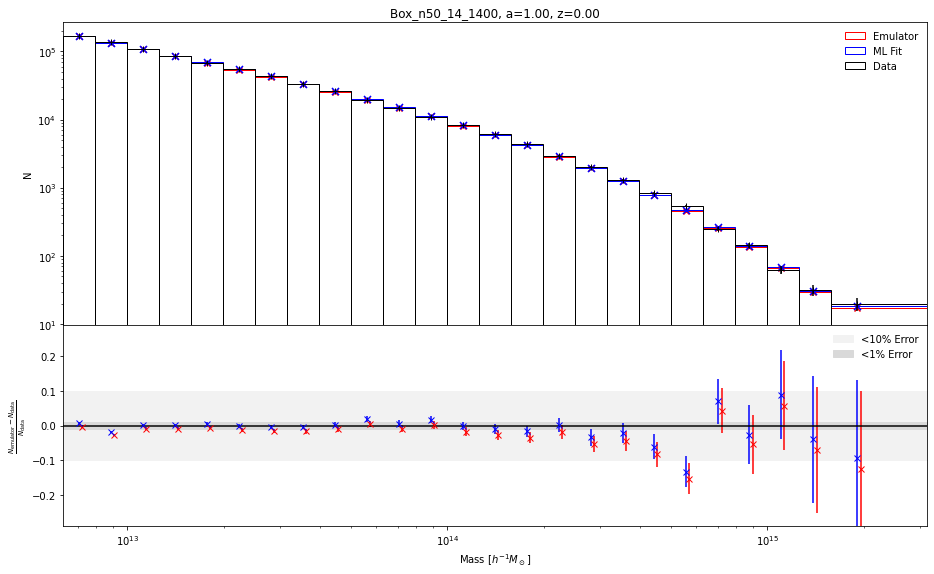

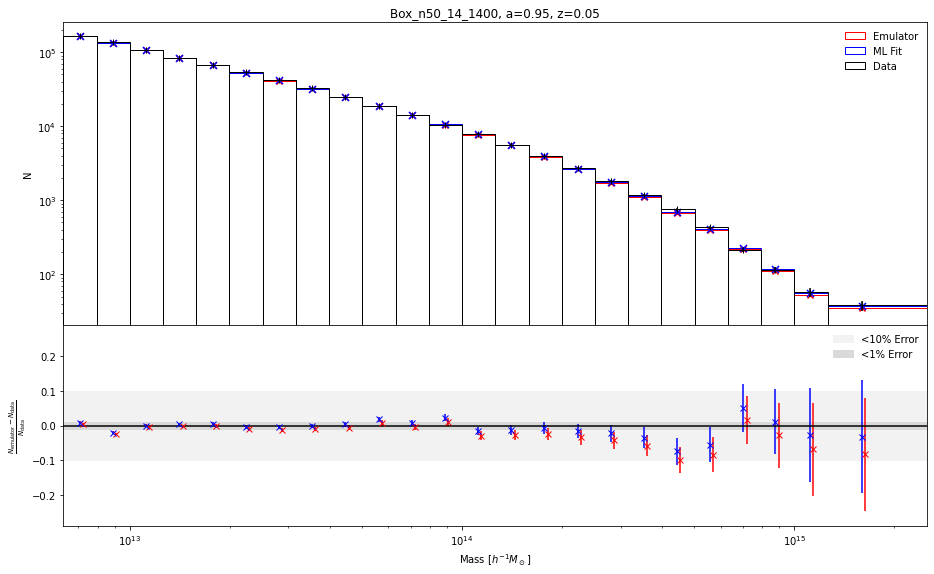

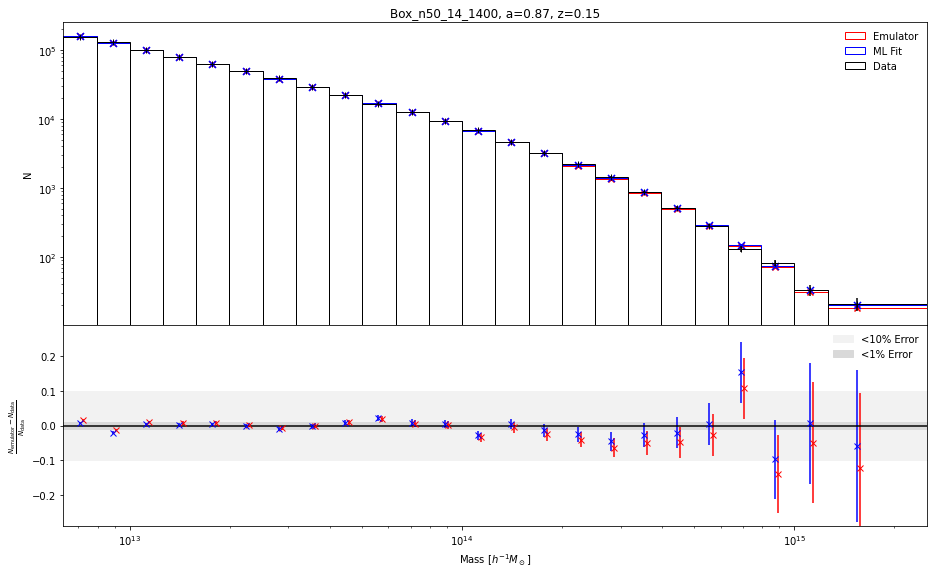

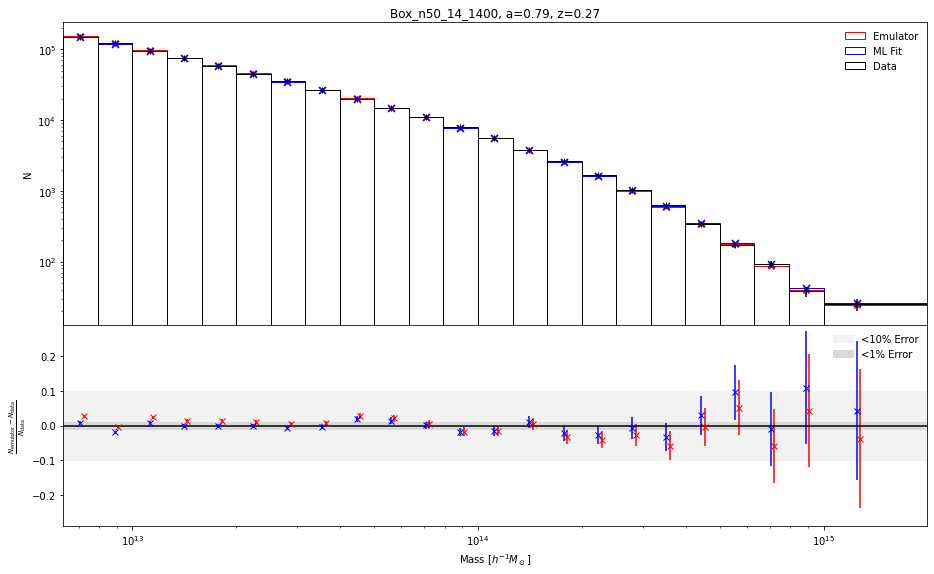

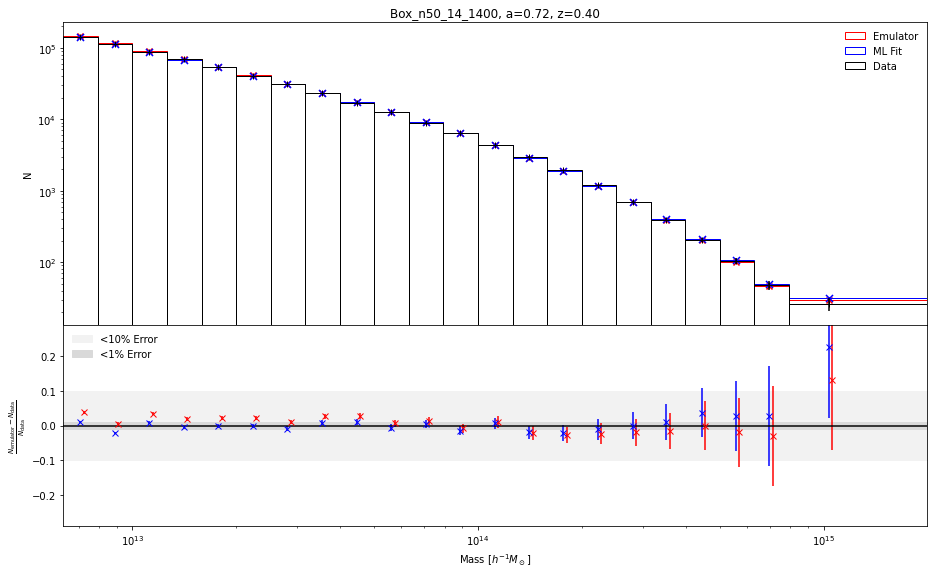

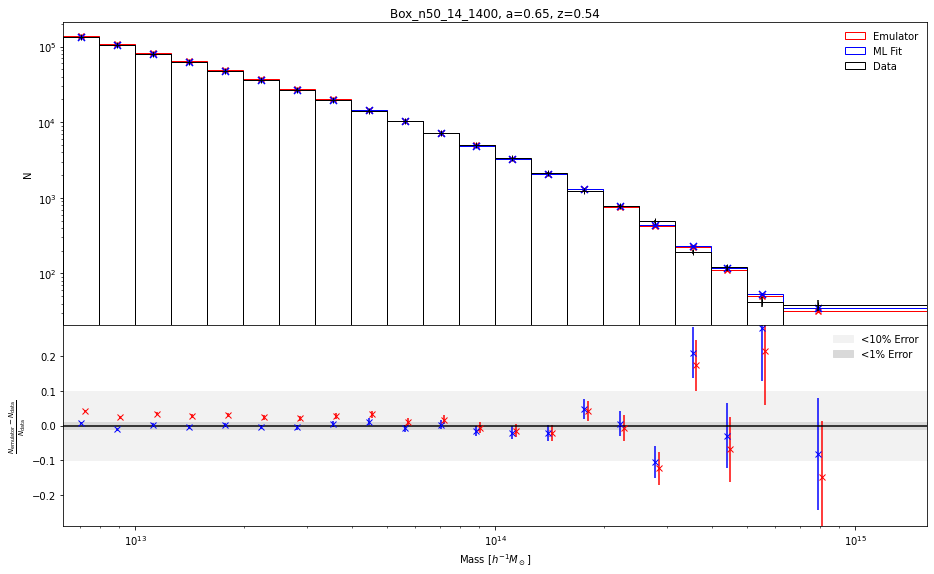

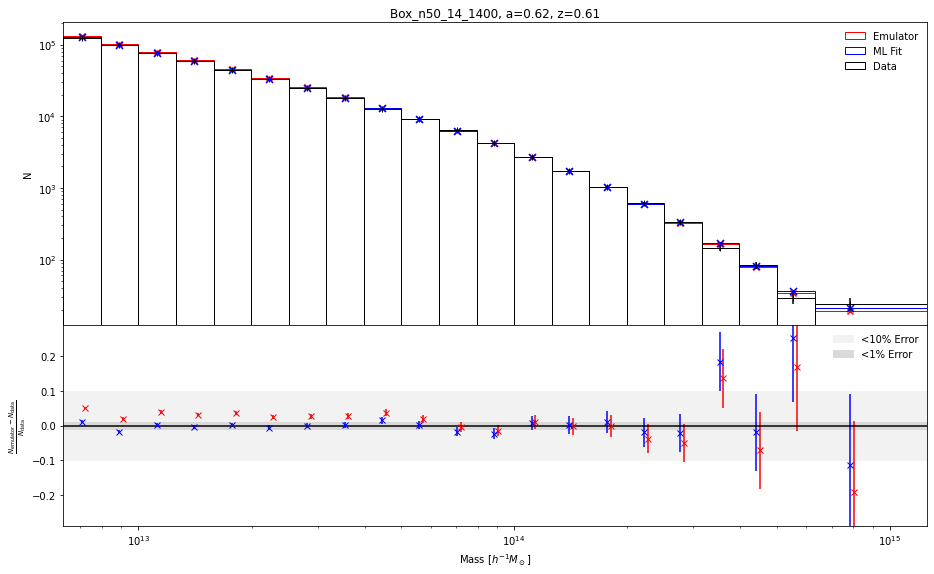

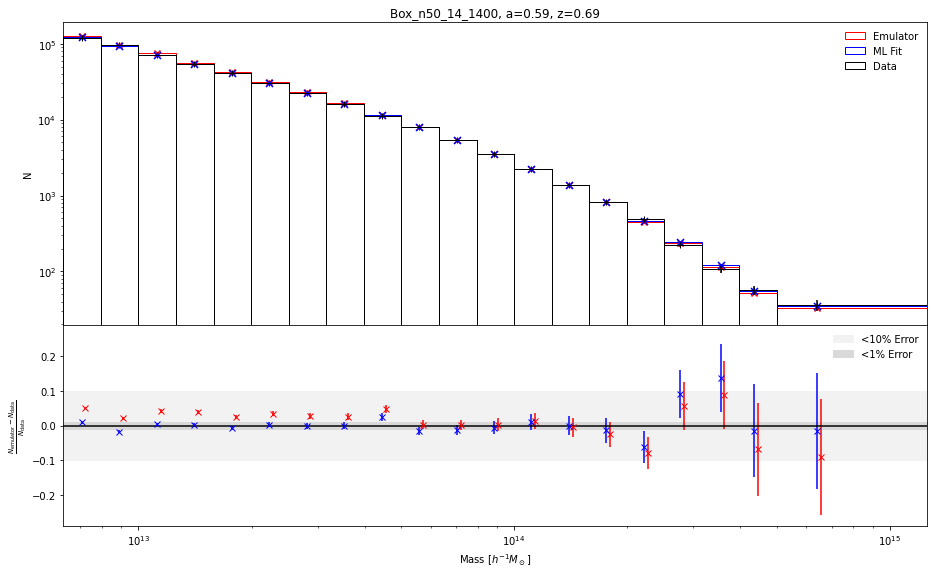

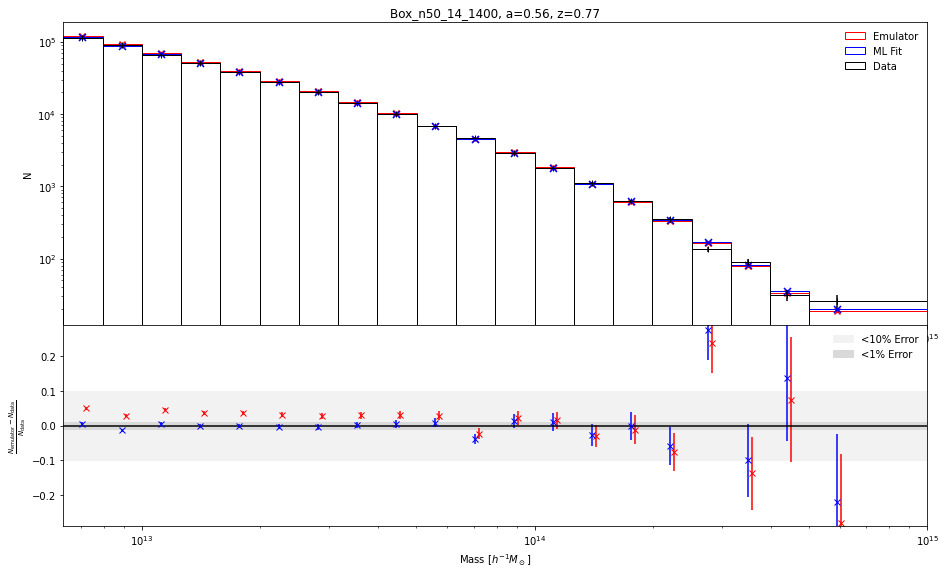

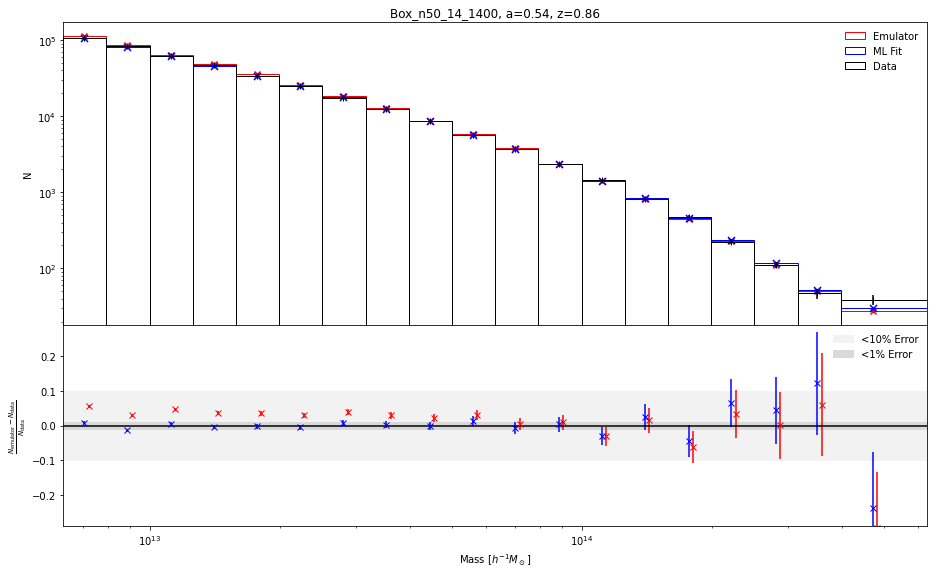

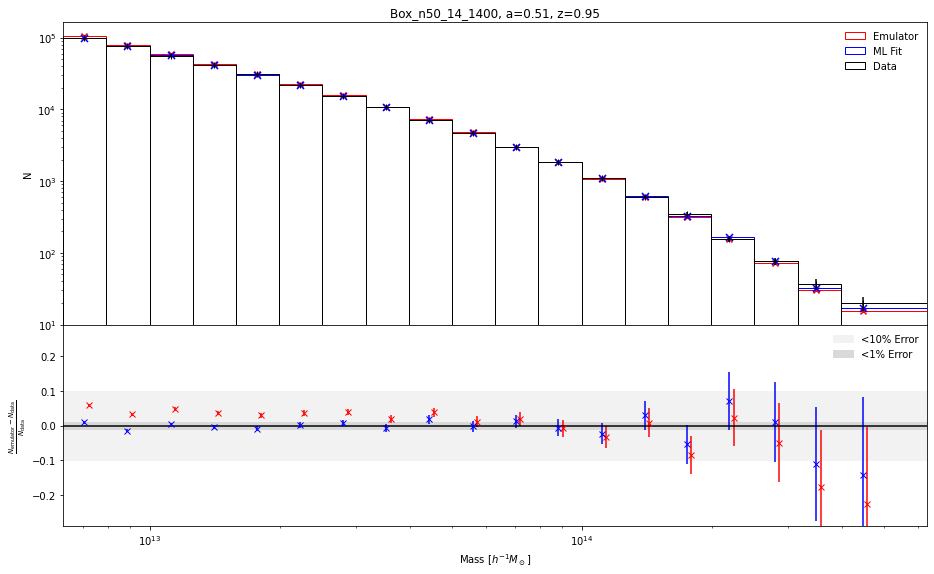

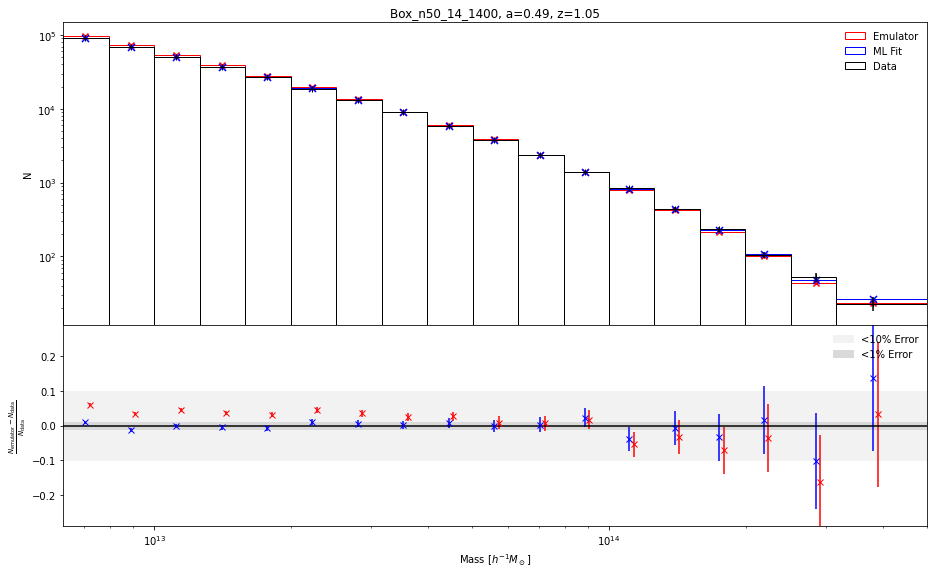

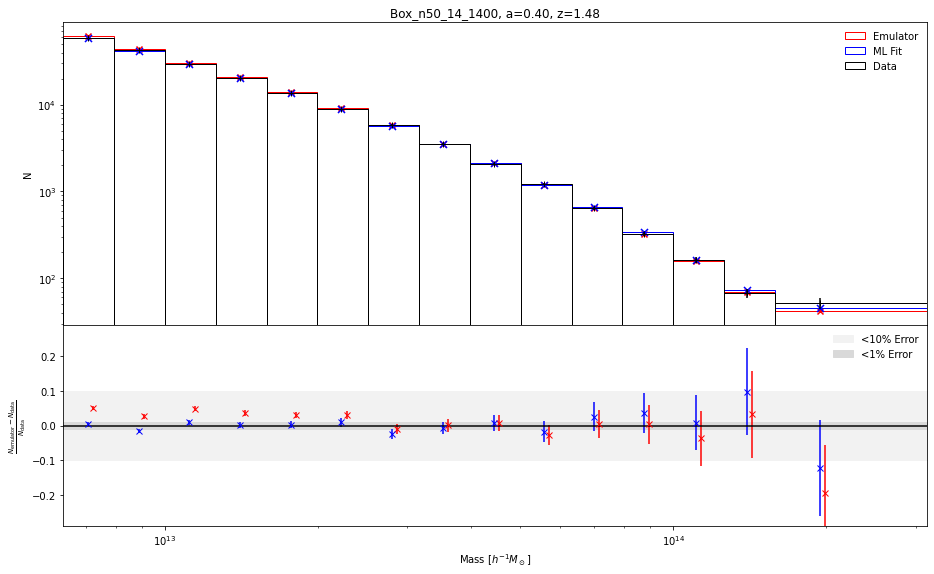

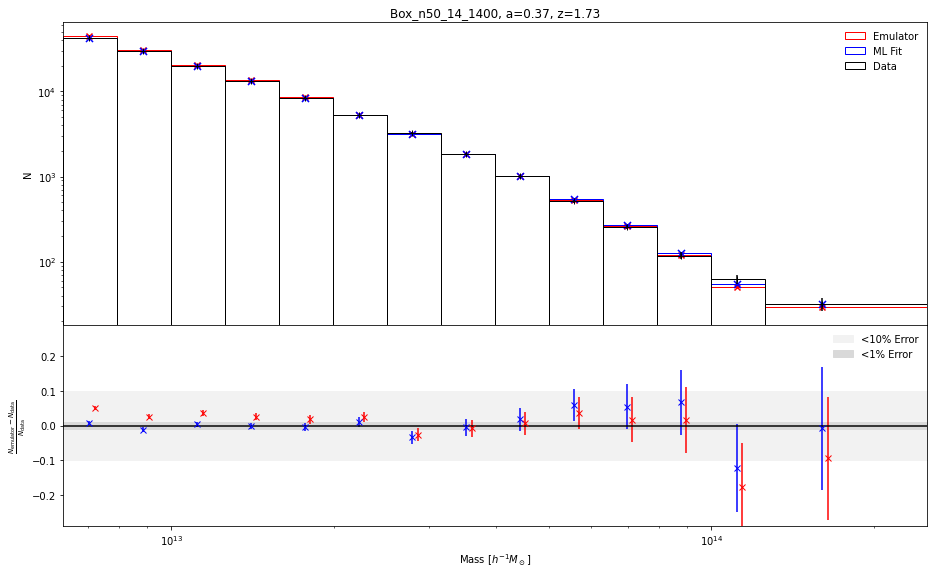

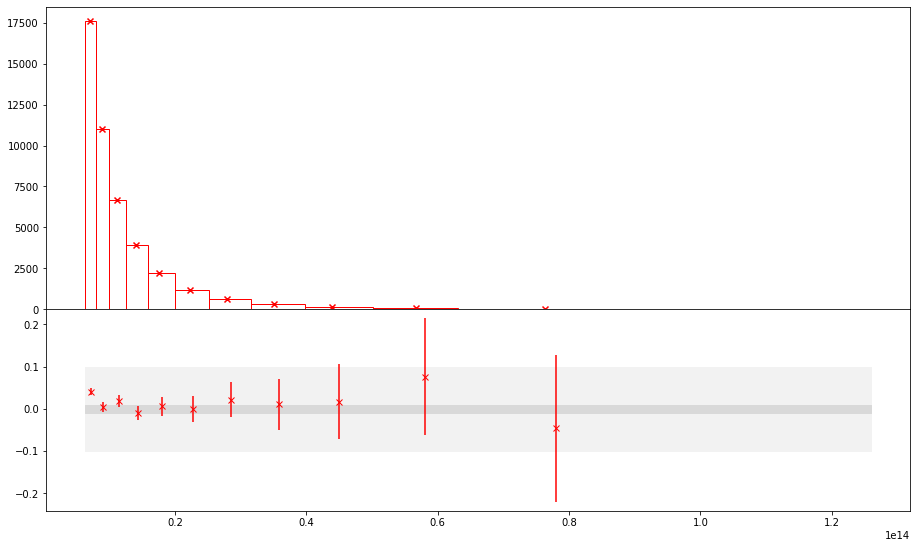

In [13]:
for a in tqdm(a_list):
    yerr = np.sqrt(np.diagonal(weighted_cov[a]))
    fig1 = plt.figure(figsize =(12, 7))

    axs=[fig1.add_axes((0.0,0.4,1,.6)), fig1.add_axes((0.0,0.0,1,.4))]
    plt.subplots_adjust(wspace=0, hspace=0)
    c_data = NvMs[a]

    Ms = M_data[a]
    N = N_data[a]
    edge_pairs = c_data['edge_pairs']

    edges = [edge[0] for edge in edge_pairs]
    edges += [edge_pairs[-1][1]]

    #shade in 1% and 10% error region
    edges = np.array(edges)
    
    

    y1 = 0.1*np.ones_like(N)
    y1 = np.append(y1, y1[-1])
    y1 = np.append(y1[0], y1)

    y2 = -0.1*np.ones_like(N)
    y2 = np.append(y2, y2[-1])
    y2 = np.append(y2[0], y2)

    c_Ms = np.append(Ms, edges[-1])
    c_Ms = np.append(edges[0], c_Ms)
    axs[1].fill_between(c_Ms, y1, y2, alpha=1, color='0.95',label='<10% Error')

    y1 = 0.01*np.ones_like(N)
    y1 = np.append(y1, y1[-1])
    y1 = np.append(y1[0], y1)

    y2 = -0.01*np.ones_like(N)
    y2 = np.append(y2, y2[-1])
    y2 = np.append(y2[0], y2)

    axs[1].fill_between(c_Ms, y1, y2, alpha=1, color='0.85',label='<1% Error')


    dM = np.array([edges[1]-edges[0] for edges in edge_pairs])


    #Emulator 
    f_dNdM_MCMC =  lambda M:Emulator(ccl_cosmo, M/h, a)*vol/(h**3 * M * np.log(10)) # h / Msun
    tinker_eval_MCMC = np.array([quad(f_dNdM_MCMC, edge[0],  edge[1], epsabs=0, epsrel=1e-5)[0] for edge in edge_pairs])

    axs[0].scatter(Ms, tinker_eval_MCMC, marker='x', c='red')
    axs[0].bar(x=edges[:-1], height=tinker_eval_MCMC, width=np.diff(edges),
               align='edge', fill=False, ec='red', label='Emulator')
    with open("/oak/stanford/orgs/kipac/users/delon/aemulusnu_massfunction/%s_%.2f_NvMemulator_loo_output.pkl"%(box, a), "wb") as f:
        pickle.dump({'Ms':Ms, 'tinker_eval':tinker_eval_MCMC, 'N':N, 'edges':edges}, f)

    tmp = np.array([c_tmp*10**(0.01)-c_tmp for c_tmp in Ms])
    axs[1].errorbar(Ms + tmp, (tinker_eval_MCMC-N)/N, yerr/N, fmt='x', color='red')

    #ML Fit

    mass_function = MassFuncAemulusNu_fitting()
    mass_function.set_params(true_params[a])
    f_dNdM_MCMC =  lambda M:mass_function(ccl_cosmo, M/h, a)*vol/(h**3 * M * np.log(10)) # h / Msun
    tinker_eval_MCMC = np.array([quad(f_dNdM_MCMC, edge[0],  edge[1], epsabs=0, epsrel=1e-5)[0] for edge in edge_pairs])
    axs[0].scatter(Ms, tinker_eval_MCMC, s=50 , marker='x', c='blue')
    axs[0].bar(x=edges[:-1], height=tinker_eval_MCMC, width=np.diff(edges), 
               align='edge', fill=False, ec='blue', label='ML Fit')
    axs[1].errorbar(Ms, (tinker_eval_MCMC-N)/N, yerr/N, fmt='x', color='blue')



    #Data
    axs[0].bar(x=edges[:-1], height=N, width=np.diff(edges),
           align='edge', fill=False, ec='black', label='Data')
    axs[0].errorbar(Ms, N, yerr, fmt='+', c='black')

    axs[0].set_xscale('log')
    axs[0].set_yscale('log')
    axs[0].legend(frameon=False)
    axs[0].set_ylabel('N')

    axs[1].set_xscale('log')
    # axs[1].set_yscale('lin', linthresh=1e-2)    
    axs[1].legend(frameon=False)
    axs[1].axhline(0, c='black')
    axs[1].set_ylabel('N')
    axs[1].set_xlabel(r'Mass $[h^{-1}M_\odot]$')
    axs[1].set_ylabel(r'$\frac{N_{\rm emulator}-N_{\rm data}}{N_{\rm data}} $')
    axs[0].set_title('%s, a=%.2f, z=%.2f'%(box, a, scaleToRedshift(a)))

    left = np.ceil(np.log10(200*Mpart) * 10) / 10
    axs[0].set_xlim((10**left, np.max(edges)))
    axs[1].set_xlim((10**left, np.max(edges)))
    axs[1].set_ylim((-.29, .29))
    axs[1].set_yticks([-.2, -.1, 0, .1, .2])

    plt.savefig('/oak/stanford/orgs/kipac/users/delon/aemulusnu_massfunction/figures/emulator/%s_emufit_%.2f.pdf'%(box, a), bbox_inches='tight')

In [ ]:

import matplotlib.pyplot as plt
# box = 'Box_n50_14_1400'
box = 'Box_n50_0_1400' 
# box = 'Box_n50_42_1400' #eh
# box = leave_out_box
# box = 'Box_n50_33_1400'
# box = 'Box_n50_11_1400'
# box = 'Box0_1400'

curr_cosmo_vals = tuple(get_cosmo_vals(cosmo_params[box]))
curr_ccl_cosmo = get_ccl_cosmology(curr_cosmo_vals)

param_names = ['d','e','f','g']
ndim = len(param_names)
fig, axs = plt.subplots(ncols=1, nrows=4, figsize=(10,15), sharex=True)
plt.subplots_adjust(wspace=0, hspace=0)

params = {'d':[], 'e':[], 'f':[], 'g':[]}
paramsEMU = {'d':[], 'e':[], 'f':[], 'g':[]}

for a in a_list:
    R = 8 / (cosmo_params[box]['H0'] / 100)
    sigma8z = cosmo.sigmaR(R, a=a)
    EMU  = (Emulator.predict_params(cosmo_params[box], scaleToRedshift(a))) #, sigma8z))
    
    with open("/oak/stanford/orgs/kipac/users/delon/aemulusnu_massfunction/%s_%.2f_params.pkl"%(box, a), "rb") as f:
        MLE_params = pickle.load(f)
    for key in MLE_params:
        params[key] += [MLE_params[key]]
        paramsEMU[key] += [EMU[key]]


for i, param in enumerate(params):
    axs[i].scatter(a_list, params[param], color='blue')
    axs[i].plot(a_list, params[param], alpha=1, color='blue')

    axs[i].scatter(a_list, paramsEMU[param], color='red')
    axs[i].plot(a_list, paramsEMU[param], alpha=1, color='red')

    axs[i].set_ylabel(param)
    axs[i].set_ylim([0,2])
    axs[i].set_xlim([0.28, 1])

axs[-1].set_xlabel('a')
axs[0].set_ylim([0.3,.45])
axs[1].set_ylim([0.28,.31])
axs[2].set_ylim([1.6,1.8])
axs[3].set_ylim([1.15, 1.2])
axs[0].set_title(box)